In [1]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

In [300]:
# mobility, incidence and variant data ['cases', alpha etc]
tr_var = pd.read_excel('tr_var.xlsx')
us_var = pd.read_excel('us_var.xlsx')
jp_var = pd.read_excel('jp_var.xlsx')
kr_var = pd.read_excel('kr_var.xlsx')

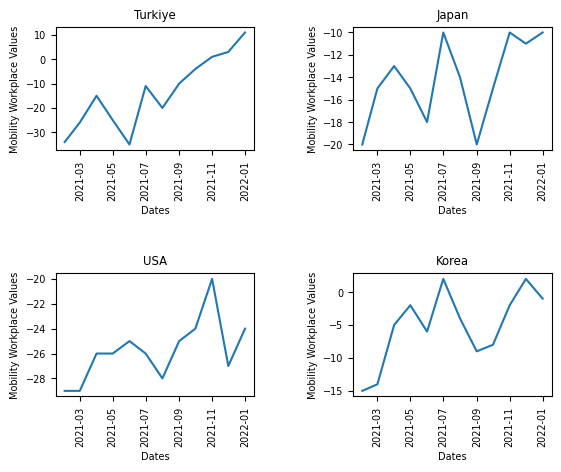

In [101]:
# mobility data graphics
x_axis_tr = tr_var["Month"]
y_axis_tr = tr_var["workplaces_percent_change_from_baseline"]

x_axis_jp = jp_var["Month"]
y_axis_jp = jp_var["workplaces_percent_change_from_baseline"]

x_axis_us = us_var["Month"]
y_axis_us = us_var["workplaces_percent_change_from_baseline"]

x_axis_kr = kr_var["Month"]
y_axis_kr = kr_var["workplaces_percent_change_from_baseline"]

plt.subplot(2, 2, 1)
plt.plot(x_axis_tr, y_axis_tr)
plt.xticks(rotation=90)
plt.title("Turkiye")
plt.xlabel('Dates')
plt.ylabel('Mobility Workplace Values')

plt.subplot(2, 2, 2)
plt.plot(x_axis_jp, y_axis_jp)
plt.xticks(rotation=90)
plt.title("Japan")
plt.xlabel('Dates')
plt.ylabel('Mobility Workplace Values')

plt.subplot(2, 2, 3)
plt.plot(x_axis_us, y_axis_us)
plt.xticks(rotation=90)
plt.title("USA")
plt.xlabel('Dates')
plt.ylabel('Mobility Workplace Values')

plt.subplot(2, 2, 4)
plt.plot(x_axis_kr, y_axis_kr)
plt.xticks(rotation=90)
plt.title("Korea")
plt.xlabel('Dates')
plt.ylabel('Mobility Workplace Values')

plt.subplots_adjust(hspace=1, wspace=0.5) 

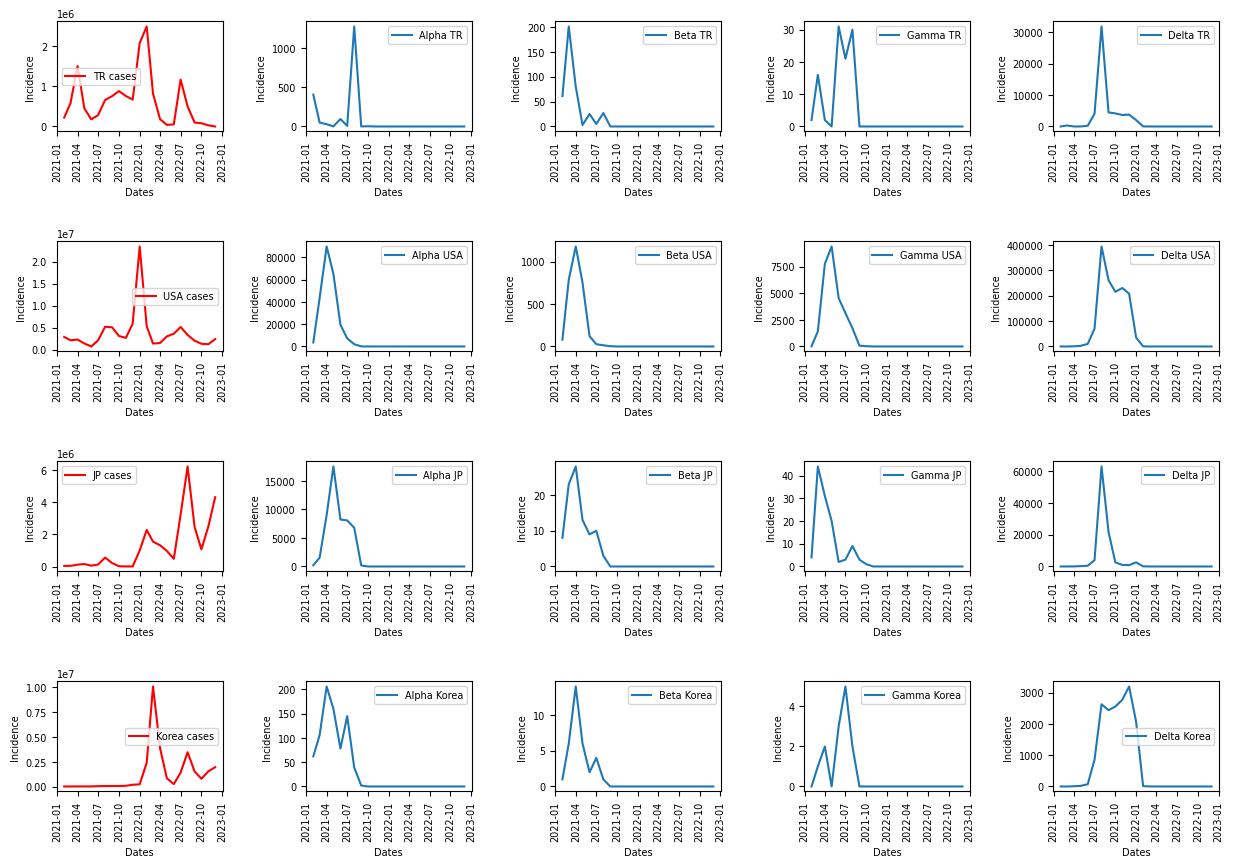

In [102]:
# Incidence data graphics
tr_x = tr_var['Month']
tr_y = tr_var['cases']

us_x = us_var['Month']
us_y = us_var['cases']

jp_x = jp_var['Month']
jp_y = jp_var['cases']

kr_x = kr_var['Month']
kr_y = kr_var['cases']

x_var_tr = tr_var['Month']
y_var_tr_alpha = tr_var['Alpha']
y_var_tr_beta = tr_var['Beta']
y_var_tr_gamma = tr_var['Gamma']
y_var_tr_delta = tr_var['Delta']

x_var_us = us_var['Month']
y_var_us_alpha = us_var['Alpha']
y_var_us_beta = us_var['Beta']
y_var_us_gamma = us_var['Gamma']
y_var_us_delta = us_var['Delta']

x_var_jp = jp_var['Month']
y_var_jp_alpha = jp_var['Alpha']
y_var_jp_beta = jp_var['Beta']
y_var_jp_gamma = jp_var['Gamma']
y_var_jp_delta = jp_var['Delta']

x_var_kr = kr_var['Month']
y_var_kr_alpha = kr_var['Alpha']
y_var_kr_beta = kr_var['Beta']
y_var_kr_gamma = kr_var['Gamma']
y_var_kr_delta = kr_var['Delta']

plt.rcParams.update({'font.size': 7})

plt.figure(figsize=(15, 10))

plt.subplot(4,5,1)
plt.plot(tr_x, tr_y, color='r', label='TR cases') 
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,2)
plt.plot(x_var_tr, y_var_tr_alpha, label='Alpha TR')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,3)
plt.plot(x_var_tr, y_var_tr_beta, label='Beta TR')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,4)
plt.plot(x_var_tr, y_var_tr_gamma, label='Gamma TR')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,5)
plt.plot(x_var_tr, y_var_tr_delta, label='Delta TR')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(4,5,6)
plt.plot(us_x, us_y, color='r', label='USA cases') 
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,7)
plt.plot(x_var_us, y_var_us_alpha, label='Alpha USA')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,8)
plt.plot(x_var_us, y_var_us_beta, label='Beta USA')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,9)
plt.plot(x_var_us, y_var_us_gamma, label='Gamma USA')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,10)
plt.plot(x_var_us, y_var_us_delta, label='Delta USA')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(4,5,11)
plt.plot(jp_x, jp_y, color='r', label='JP cases') 
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,12)
plt.plot(x_var_jp, y_var_jp_alpha, label='Alpha JP')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,13)
plt.plot(x_var_jp, y_var_jp_beta, label='Beta JP')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,14)
plt.plot(x_var_jp, y_var_jp_gamma, label='Gamma JP')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,15)
plt.plot(x_var_jp, y_var_jp_delta, label='Delta JP')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(4,5,16)
plt.plot(kr_x, kr_y, color='r', label='Korea cases') 
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,17)
plt.plot(x_var_kr, y_var_kr_alpha, label='Alpha Korea')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,18)
plt.plot(x_var_kr, y_var_kr_beta, label='Beta Korea')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,19)
plt.plot(x_var_kr, y_var_kr_gamma, label='Gamma Korea')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,20)
plt.plot(x_var_kr, y_var_kr_delta, label='Delta Korea')
plt.xlabel('Dates')
plt.ylabel('Incidence')
plt.xticks(rotation=90)
plt.legend()

plt.subplots_adjust(hspace=1, wspace=0.5) 

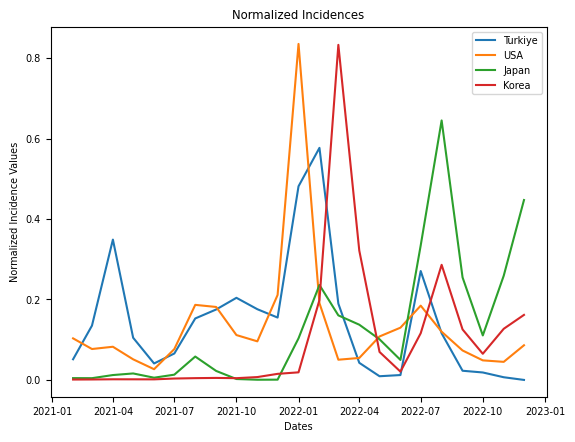

In [103]:
# Normalized Total Incidence of Covid19
normalized_arr_tr = preprocessing.normalize([tr_y])
tr_nor = np.transpose(normalized_arr_tr)

normalized_arr_us = preprocessing.normalize([us_y])
us_nor= np.transpose(normalized_arr_us)

normalized_arr_jp = preprocessing.normalize([jp_y])
jp_nor = np.transpose(normalized_arr_jp)

normalized_arr_kr = preprocessing.normalize([kr_y])
kr_nor = np.transpose(normalized_arr_kr)

plt.plot(tr_x, tr_nor, label='Turkiye')
plt.plot(us_x, us_nor, label='USA')
plt.plot(jp_x, jp_nor, label='Japan')
plt.plot(kr_x, kr_nor, label='Korea')
plt.title('Normalized Incidences')
plt.xlabel('Dates')
plt.ylabel('Normalized Incidence Values')
plt.legend()
plt.show()

Text(0, 0.5, 'Mobility Values (Percentage Change from Baseline)')

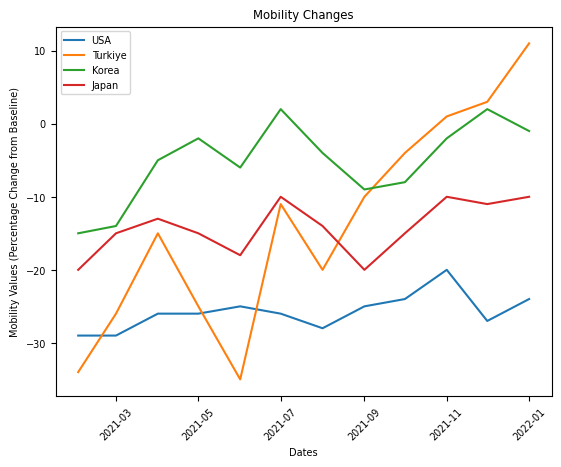

In [104]:
# sosyo-ekonomik sonuç yorum
x_axis_tr = tr_var["Month"][0:12] 
y_axis_tr = tr_var["workplaces_percent_change_from_baseline"][0:12]  
x_axis_us = us_var["Month"][0:12] 
y_axis_us = us_var["workplaces_percent_change_from_baseline"][0:12]  
x_axis_kr = kr_var["Month"][0:12] 
y_axis_kr = kr_var["workplaces_percent_change_from_baseline"][0:12] 
x_axis_jp = jp_var["Month"][0:12] 
y_axis_jp = jp_var["workplaces_percent_change_from_baseline"][0:12] 

plt.plot(x_axis_us, y_axis_us, label='USA')
plt.xticks(rotation=45)
plt.legend() 
plt.plot(x_axis_tr, y_axis_tr, label='Turkiye')
plt.xticks(rotation=45)
plt.legend() 
plt.plot(x_axis_kr, y_axis_kr, label='Korea')
plt.xticks(rotation=45)
plt.legend()
plt.plot(x_axis_jp, y_axis_jp, label='Japan')
plt.xticks(rotation=45)
plt.legend() 
plt.title("Mobility Changes")
plt.xlabel('Dates')
plt.ylabel('Mobility Values (Percentage Change from Baseline)')

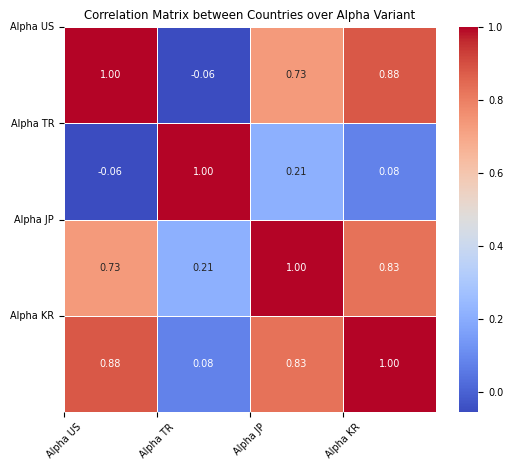

In [105]:
potential_common_key = 'Month'

us_var1 = pd.DataFrame({'Alpha US': y_var_us_alpha})
tr_var1= pd.DataFrame({'Alpha TR': y_var_tr_alpha})
jp_var1 = pd.DataFrame({'Alpha JP': y_var_jp_alpha})
kr_var1 = pd.DataFrame({'Alpha KR': y_var_kr_alpha})

# Combine the datasets (concatenate along columns)
combined_data = pd.concat([us_var1, tr_var1, jp_var1, kr_var1], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plotting Correlation Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index, rotation=0)
plt.title('Correlation Matrix between Countries over Alpha Variant')
plt.show()

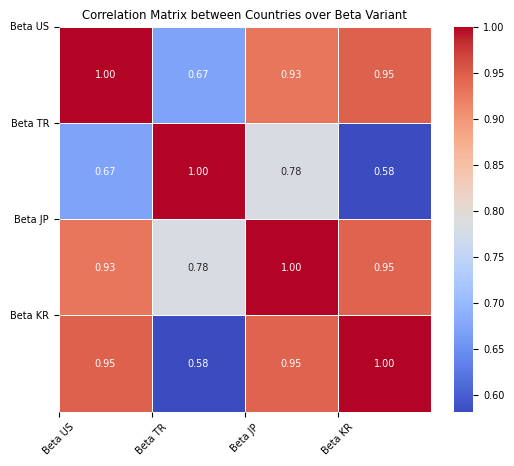

In [106]:
potential_common_key = 'Month'

us_var1 = pd.DataFrame({'Beta US': y_var_us_beta})
tr_var1 = pd.DataFrame({'Beta TR': y_var_tr_beta})
jp_var1 = pd.DataFrame({'Beta JP': y_var_jp_beta})
kr_var1 = pd.DataFrame({'Beta KR': y_var_kr_beta})

combined_data = pd.concat([us_var1, tr_var1, jp_var1, kr_var1], axis=1)

correlation_matrix = combined_data.corr()

# Plotting Correlation Matrix
plt.figure(figsize=(6, 5))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index, rotation=0)
plt.title('Correlation Matrix between Countries over Beta Variant')
plt.show()

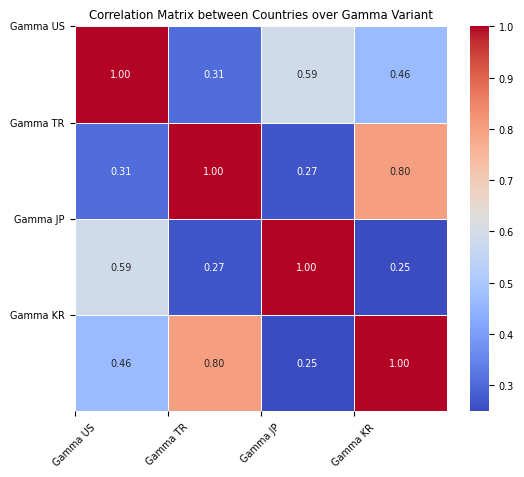

In [107]:
# Sample data and code to generate correlation matrix
potential_common_key = 'Month'

# Sample dataframes
us_var1 = pd.DataFrame({'Gamma US': y_var_us_gamma})
tr_var1 = pd.DataFrame({'Gamma TR': y_var_tr_gamma})
jp_var1 = pd.DataFrame({'Gamma JP': y_var_jp_gamma})
kr_var1 = pd.DataFrame({'Gamma KR': y_var_kr_gamma})

# Combine the datasets (concatenate along columns)
combined_data = pd.concat([us_var1, tr_var1, jp_var1, kr_var1], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plotting Correlation Matrix
plt.figure(figsize=(6, 5))

# Create a heatmap using seaborn with x and y labels
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the labels for x and y axes
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index, rotation=0)

# Set the title
plt.title('Correlation Matrix between Countries over Gamma Variant')

plt.show()

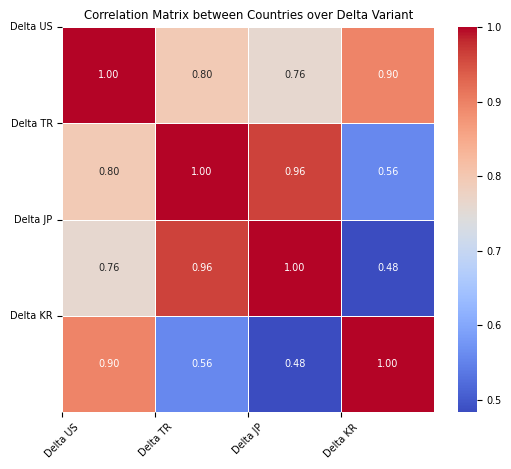

In [108]:
# Sample data and code to generate correlation matrix
potential_common_key = 'Month'

# Sample dataframes
us_var1 = pd.DataFrame({'Delta US': y_var_us_delta})
tr_var1 = pd.DataFrame({'Delta TR': y_var_tr_delta})
jp_var1 = pd.DataFrame({'Delta JP': y_var_jp_delta})
kr_var1 = pd.DataFrame({'Delta KR': y_var_kr_delta})

# Combine the datasets (concatenate along columns)
combined_data = pd.concat([us_var1, tr_var1, jp_var1, kr_var1], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plotting Correlation Matrix
plt.figure(figsize=(6, 5))

# Create a heatmap using seaborn with x and y labels
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the labels for x and y axes
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index, rotation=0)

# Set the title
plt.title('Correlation Matrix between Countries over Delta Variant')

plt.show()

In [172]:
# Lagged Correlation between mobility and variants (USA)
lag = 1 

y_var_us_alpha1 = y_var_us_alpha[5:11]
y_var_us_beta1 = y_var_us_beta[5:11]
y_var_us_gamma1 = y_var_us_gamma[5:11]
y_var_us_delta1 = y_var_us_delta[5:11]
y_axis_us1 = y_axis_us[5:10]

# Shift the y_var_us_delta time series by the lag value
y_var_us_alpha_shifted = y_var_us_alpha1.shift(periods=lag)
combined_data1 = pd.concat([y_var_us_alpha_shifted, y_axis_us1], axis=1)

y_var_us_beta_shifted = y_var_us_beta1.shift(periods=lag)
combined_data2 = pd.concat([y_var_us_beta_shifted, y_axis_us1], axis=1)

y_var_us_gamma_shifted = y_var_us_gamma1.shift(periods=lag)
combined_data3 = pd.concat([y_var_us_gamma_shifted, y_axis_us1], axis=1)

y_var_us_delta_shifted = y_var_us_delta1.shift(periods=lag)
combined_data4 = pd.concat([y_var_us_delta_shifted, y_axis_us1], axis=1)

# Calculate the correlation matrix
alpha = 0.5 # Define significance level (alpha)
correlation_matrix1 = combined_data1.corr(method='pearson')
correlation_matrix2 = combined_data2.corr(method='pearson')
correlation_matrix3 = combined_data3.corr(method='pearson')
correlation_matrix4 = combined_data4.corr(method='pearson')

# Calculate the correlation coefficient and p-value for the correlation between y_var_us_delta_shifted and y_axis_us
correlation_coefficient1, p_value1 = pearsonr(y_var_us_alpha_shifted.dropna(), y_axis_us1.dropna())
correlation_coefficient2, p_value2 = pearsonr(y_var_us_beta_shifted.dropna(), y_axis_us1.dropna())
correlation_coefficient3, p_value3 = pearsonr(y_var_us_gamma_shifted.dropna(), y_axis_us1.dropna())
correlation_coefficient4, p_value4 = pearsonr(y_var_us_delta_shifted.dropna(), y_axis_us1.dropna())

print("Alpha variant:\n")
print('Correlation values:\n', correlation_matrix1.values)
print("P-value:", p_value1)

if p_value1 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

print("\nBeta variant:\n")
print('Correlation values:\n', correlation_matrix2.values)
print("P-value:", p_value2)

if p_value2 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

print("\nGamma variant:\n")
print('Correlation values:\n', correlation_matrix3.values)
print("P-value:", p_value3)

if p_value3 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

print("\nDelta variant:\n")
print('Correlation values:\n', correlation_matrix4.values)
print("P-value:", p_value4)

if p_value4 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")


Alpha variant:

Correlation values:
 [[ 1.         -0.85014527]
 [-0.85014527  1.        ]]
P-value: 0.4334385575519081
Reject the null hypothesis: There is a significant correlation.

Beta variant:

Correlation values:
 [[ 1.         -0.91434705]
 [-0.91434705  1.        ]]
P-value: 0.2603804478794389
Reject the null hypothesis: There is a significant correlation.

Gamma variant:

Correlation values:
 [[ 1.         -0.87494648]
 [-0.87494648  1.        ]]
P-value: 0.2690129302720476
Reject the null hypothesis: There is a significant correlation.

Delta variant:

Correlation values:
 [[1.         0.31905355]
 [0.31905355 1.        ]]
P-value: 0.6764117018462718
Fail to reject the null hypothesis: There is no significant correlation.


In [160]:
# Lagged Correlation between mobility and variants (USA)
lag = 1 

y_var_kr_alpha1 = y_var_kr_alpha[0:13]
y_var_kr_beta1 = y_var_kr_beta[0:13]
y_var_kr_gamma1 = y_var_kr_gamma[0:13]
y_var_kr_delta1 = y_var_kr_delta[0:13]
y_var_kr_case = kr_var['cases'][0:13]
y_axis_kr1 = y_axis_kr[0:12]

# Shift the y_var_us_delta time series by the lag value
y_var_kr_alpha_shifted = y_var_kr_alpha1.shift(periods=lag)
combined_data1 = pd.concat([y_var_kr_alpha_shifted, y_axis_kr1], axis=1)

y_var_kr_beta_shifted = y_var_kr_beta1.shift(periods=lag)
combined_data2 = pd.concat([y_var_kr_beta_shifted, y_axis_kr1], axis=1)

y_var_kr_gamma_shifted = y_var_kr_gamma1.shift(periods=lag)
combined_data3 = pd.concat([y_var_kr_gamma_shifted, y_axis_kr1], axis=1)

y_var_kr_delta_shifted = y_var_kr_delta1.shift(periods=lag)
combined_data4 = pd.concat([y_var_kr_delta_shifted, y_axis_kr1], axis=1)

y_var_kr_case_shifted = y_var_kr_case.shift(periods=lag)
combined_data5 = pd.concat([y_var_kr_case_shifted, y_axis_kr1], axis=1)

# Calculate the correlation matrix
alpha = 0.5 # Define significance level (alpha)
correlation_matrix1 = combined_data1.corr(method='pearson')
correlation_matrix2 = combined_data2.corr(method='pearson')
correlation_matrix3 = combined_data3.corr(method='pearson')
correlation_matrix4 = combined_data4.corr(method='pearson')
correlation_matrix5 = combined_data5.corr(method='pearson')

# Calculate the correlation coefficient and p-value for the correlation between y_var_us_delta_shifted and y_axis_us
correlation_coefficient1, p_value1 = pearsonr(y_var_kr_alpha_shifted.dropna(), y_axis_kr1.dropna())
correlation_coefficient2, p_value2 = pearsonr(y_var_kr_beta_shifted.dropna(), y_axis_kr1.dropna())
correlation_coefficient3, p_value3 = pearsonr(y_var_kr_gamma_shifted.dropna(), y_axis_kr1.dropna())
correlation_coefficient4, p_value4 = pearsonr(y_var_kr_delta_shifted.dropna(), y_axis_kr1.dropna())
correlation_coefficient5, p_value5 = pearsonr(y_var_kr_case_shifted.dropna(), y_axis_kr1.dropna())

print("Alpha variant:\n")
print('Correlation values:\n', correlation_matrix1.values)
print("P-value:", p_value1)

if p_value1 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Accept the null hypothesis: There is no significant correlation.")

print("\nBeta variant:\n")
print('Correlation values:\n', correlation_matrix2.values)
print("P-value:", p_value2)

if p_value2 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Accept the null hypothesis: There is no significant correlation.")

print("\nGamma variant:\n")
print('Correlation values:\n', correlation_matrix3.values)
print("P-value:", p_value3)

if p_value3 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Accept the null hypothesis: There is no significant correlation.")

print("\nDelta variant:\n")
print('Correlation values:\n', correlation_matrix4.values)
print("P-value:", p_value4)

if p_value4 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Accept the null hypothesis: There is no significant correlation.")
    
print("Total Incidence:\n")
print('Correlation values:\n', correlation_matrix5.values)
print("P-value:", p_value5)

if p_value5 < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Accept the null hypothesis: There is no significant correlation.")


Alpha variant:

Correlation values:
 [[ 1.         -0.04262034]
 [-0.04262034  1.        ]]
P-value: 0.9961415348490333
Accept the null hypothesis: There is no significant correlation.

Beta variant:

Correlation values:
 [[1.         0.07819962]
 [0.07819962 1.        ]]
P-value: 0.8725260380562663
Accept the null hypothesis: There is no significant correlation.

Gamma variant:

Correlation values:
 [[1.         0.18080493]
 [0.18080493 1.        ]]
P-value: 0.38859060509035714
Reject the null hypothesis: There is a significant correlation.

Delta variant:

Correlation values:
 [[1.         0.19331715]
 [0.19331715 1.        ]]
P-value: 0.18966461591232442
Reject the null hypothesis: There is a significant correlation.
Total Incidence:

Correlation values:
 [[1.         0.32488501]
 [0.32488501 1.        ]]
P-value: 0.06737735175202797
Reject the null hypothesis: There is a significant correlation.


Linear Regression Model: In OLS regression, we assume that the relationship between the dependent variable Y and the independent variables X is linear.

Dependent Variable (Y):

Mobility: This could be measured using various metrics such as:
Changes in mobility patterns derived from mobile phone data or GPS tracking.
Daily or weekly movement trends based on transportation usage (e.g., public transportation, driving, walking).
Changes in visits to specific locations like workplaces, retail stores, parks, and residential areas.
Independent Variables (X):

COVID Variants: These could include:
Presence and prevalence of specific COVID-19 variants such as Alpha, Beta, Gamma, Delta, and others.
Proportions or percentages of COVID-19 cases attributed to each variant.
Time series data representing the spread or incidence rates of different variants over time.
Other relevant factors related to COVID-19, such as vaccination rates, testing rates, government interventions, and public health measures.

Lagged regression, also known as lagged dependent variable regression or autoregressive model, is a statistical technique used in time series analysis to model the relationship between a dependent variable and its lagged values, as well as other independent variables. In lagged regression, the lag value refers to the number of time periods by which the independent variable is shifted or lagged before being used in the regression analysis. It allows you to examine how past values of the independent variable may influence the dependent variable.

Dependent Variable: Lagged regression involves regressing a dependent variable on its own lagged values. These lagged values represent the historical values of the dependent variable.

Independent Variables: In addition to lagged values of the dependent variable, lagged regression may also include other independent variables that are believed to influence the dependent variable.

In [165]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Example dataset with independent variable X and dependent variable y

# independent --> alpha  
# dependent --> mobility

df = tr_var

# Create lagged variable for X (e.g., lag of 1 time step)
df['X_lagged'] = df['Alpha'].shift(1)

# Drop missing values resulting from the shift operation
df.dropna(inplace=True)

# Prepare the feature matrix X and target variable y
X = df[['X_lagged']]
y = df['workplaces_percent_change_from_baseline']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print("R^2 score:", r2)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient for X_lagged:", model.coef_)

R^2 score: 4.789433725171932e-06
Intercept: -10.488832031244296
Coefficient for X_lagged: [-7.61279397e-05]


In [290]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Example dataset with independent variable X and dependent variable y
# independent --> alpha  
# dependent --> mobility

df = kr_var

# Create lagged variable for X (e.g., lag of 1 time step)
df['X_lagged'] = df['Alpha'].shift(1)

# Drop missing values resulting from the shift operation
df.dropna(inplace=True)

# Prepare the feature matrix X and target variable y
X = df[['X_lagged']]
y = df['workplaces_percent_change_from_baseline']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate R^2 score
r2_kra = r2_score(y, y_pred)
print("R^2 score:", r2)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient for X_lagged:", model.coef_)

R^2 score: 0.009984349199449238
Intercept: -4.068846780972443
Coefficient for X_lagged: [-0.00281038]


R-squared (R²):

R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model.
A higher R-squared indicates that the independent variables collectively explain a larger portion of the variance in the dependent variable.
However, R-squared does not indicate whether the regression model is a good fit in absolute terms, so it should be interpreted in conjunction with other metrics.
Coefficients (Beta coefficients):

The coefficients represent the estimated effects of the independent variables on the dependent variable, holding other variables constant.
Positive coefficients indicate a positive relationship between the independent variable and the dependent variable, while negative coefficients indicate a negative relationship.
The magnitude of the coefficients indicates the strength of the relationship. Larger coefficients suggest a stronger impact on the dependent variable.
Standard Errors:

Standard errors measure the variability or uncertainty in the estimated coefficients.
Lower standard errors indicate more precise estimates of the coefficients.
T-statistics, obtained by dividing the coefficient estimate by its standard error, can be used to test the statistical significance of the coefficients.
P-values:

P-values indicate the statistical significance of the coefficients.
A low p-value (typically below 0.05) suggests that the coefficient is statistically significant, meaning that it is unlikely to have occurred by chance alone.
High p-values indicate that the coefficient may not be statistically significant, and the corresponding variable may not have a meaningful impact on the dependent variable.
Residual Analysis:

Residuals represent the differences between the observed values of the dependent variable and the values predicted by the regression model.
Analyzing residuals helps assess the goodness-of-fit of the model and identify any patterns or heteroscedasticity (unequal variance) in the residuals.
Ideally, residuals should be normally distributed around zero with constant variance.

Coefficient Plot:

Plot the estimated coefficients along with their confidence intervals to visualize the magnitude and uncertainty of the effects of independent variables on the dependent variable.

Residual Plot:

Plot the residuals (the differences between observed and predicted values) against the predicted values.
Check for patterns or trends in the residuals, which may indicate violations of regression assumptions.

In [211]:
# frequences of variants
fr_alpha = (y_var_tr_alpha/tr_y)*100
fr_beta = (y_var_tr_beta/tr_y)*100
fr_gamma = (y_var_tr_gamma/tr_y)*100
fr_delta = (y_var_tr_delta/tr_y)*100

freq_table = pd.DataFrame({
    'Date': x_axis_tr[0:12],
    'Alpha Frequency': fr_alpha[0:12],
    'Beta Frequency': fr_beta[0:12],
    'Gamma Frequency': fr_gamma[0:12],
    'Delta Frequency': fr_delta[0:12]
})

freq_table

,Date,Alpha Frequency,Beta Frequency,Gamma Frequency,Delta Frequency
0,2021-02-01,0.183566,0.027445,0.000900,0.000450
1,2021-03-01,0.008551,0.034376,0.002736,0.053872
2,2021-04-01,0.001919,0.005295,0.000132,0.000000
3,2021-05-01,0.000220,0.000660,0.000000,0.000220
4,2021-06-01,0.054162,0.014105,0.017490,0.136534
5,2021-07-01,0.002460,0.001757,0.007380,1.424671
6,2021-08-01,0.193585,0.004080,0.004534,4.807737
7,2021-09-01,0.000000,0.000000,0.000000,0.588772
8,2021-10-01,0.000339,0.000000,0.000000,0.470549
9,2021-11-01,0.000000,0.000000,0.000000,0.479292


In [21]:
fr_alpha_us = (y_var_us_alpha/us_y)*100
fr_beta_us = (y_var_us_beta/us_y)*100
fr_gamma_us = (y_var_us_gamma/us_y)*100
fr_delta_us = (y_var_us_delta/us_y)*100

freq_table_us = pd.DataFrame({
    'Date': x_axis_us[0:12],
    'Alpha Frequency': fr_alpha_us[0:12],
    'Beta Frequency': fr_beta_us[0:12],
    'Gamma Frequency': fr_gamma_us[0:12],
    'Delta Frequency': fr_delta_us[0:12]
})

freq_table_us

,Date,Alpha Frequency,Beta Frequency,Gamma Frequency,Delta Frequency
0,2021-01-01,0.123487,0.002759,0.000724,0.003829
1,2021-02-01,2.014644,0.036415,0.065918,0.001392
2,2021-03-01,3.873062,0.050960,0.335884,0.026452
3,2021-04-01,4.524330,0.052281,0.654309,0.174106
4,2021-05-01,2.608250,0.016189,0.608480,1.364933
5,2021-06-01,0.337101,0.001255,0.145773,3.259728
6,2021-07-01,0.039218,0.000267,0.032914,7.517775
7,2021-08-01,0.001533,0.000059,0.001454,5.126815
8,2021-09-01,0.000192,0.000000,0.000831,6.878878
9,2021-10-01,0.000037,0.000000,0.000037,8.555312


In [24]:
fr_alpha_jp = (y_var_jp_alpha/jp_y)*100
fr_beta_jp = (y_var_jp_beta/jp_y)*100
fr_gamma_jp = (y_var_jp_gamma/jp_y)*100
fr_delta_jp = (y_var_jp_delta/jp_y)*100

freq_table_jp = pd.DataFrame({
    'Date': x_axis_jp[0:12],
    'Alpha Frequency': fr_alpha_jp[0:12],
    'Beta Frequency': fr_beta_jp[0:12],
    'Gamma Frequency': fr_gamma_jp[0:12],
    'Delta Frequency': fr_delta_jp[0:12]
})

freq_table_jp

,Date,Alpha Frequency,Beta Frequency,Gamma Frequency,Delta Frequency
0,2021-01-01,0.455439,0.018495,0.009247,0.002312
1,2021-02-01,3.702381,0.054762,0.104762,0.002381
2,2021-03-01,7.717262,0.023967,0.026535,0.026535
3,2021-04-01,11.290624,0.008381,0.012894,0.154083
4,2021-05-01,15.441660,0.016897,0.003755,0.869239
5,2021-06-01,6.410267,0.007946,0.002384,3.139576
6,2021-07-01,1.209823,0.000535,0.001606,11.260150
7,2021-08-01,0.085055,0.000000,0.001394,10.118240
8,2021-09-01,0.004639,0.000000,0.004639,12.192067
9,2021-10-01,0.000000,0.000000,0.000000,21.599099


In [27]:
fr_alpha_kr = (y_var_kr_alpha/kr_y)*100
fr_beta_kr = (y_var_kr_beta/kr_y)*100
fr_gamma_kr = (y_var_kr_gamma/kr_y)*100
fr_delta_kr = (y_var_kr_delta/kr_y)*100

freq_table_kr = pd.DataFrame({
    'Date': x_axis_kr[0:12],
    'Alpha Frequency': fr_alpha_kr[0:12],
    'Beta Frequency': fr_beta_kr[0:12],
    'Gamma Frequency': fr_gamma_kr[0:12],
    'Delta Frequency': fr_delta_kr[0:12]
})

freq_table_kr

,Date,Alpha Frequency,Beta Frequency,Gamma Frequency,Delta Frequency
0,2021-01-01,0.538335,0.008683,0.000000,0.000000
1,2021-02-01,0.778782,0.044082,0.007347,0.000000
2,2021-03-01,1.084496,0.073704,0.010529,0.036852
3,2021-04-01,0.880524,0.033020,0.000000,0.104562
4,2021-05-01,0.460857,0.011817,0.017725,0.425406
5,2021-06-01,0.344737,0.009510,0.011887,2.037517
6,2021-07-01,0.072684,0.001864,0.003727,4.892186
7,2021-08-01,0.003315,0.000000,0.000000,4.040973
8,2021-09-01,0.000000,0.000000,0.000000,4.852413
9,2021-10-01,0.000000,0.000000,0.000000,3.224718


The reproductive ratio (R-naught), is a key epidemiological metric that quantifies the average number of secondary infections generated by a single infectious individual in a susceptible population. Calculating the reproductive ratio for COVID variants using the Cori method involves analyzing the growth rate of the variants and estimating their transmission potential relative to the original strain.

Here's a general outline of how you can calculate the reproductive ratio using the Cori method for COVID variants:

Estimate the Growth Rate:

Calculate the growth rate of COVID variants by analyzing the change in the number of cases over time.
You can use regression analysis or other statistical methods to estimate the growth rate based on epidemiological data.
Define the Serial Interval:

The serial interval represents the time between the onset of symptoms in an index case and the onset of symptoms in secondary cases.
Estimate the serial interval for COVID variants based on epidemiological studies and observational data.

Interpretation:

A reproductive ratio greater than 1 indicates that the variant is spreading exponentially and has the potential to cause sustained transmission.
A reproductive ratio less than 1 suggests that the variant is not capable of sustained transmission and may eventually die out.
Considerations:

The calculation of the reproductive ratio using the Cori method relies on assumptions about the dynamics of transmission and the accuracy of parameter estimates.
Variability in human behavior, public health interventions, and other factors can influence the reproductive ratio and its interpretation.
Data Sources:

Obtain reliable and up-to-date data on COVID variant cases, including case counts, sequencing data, and epidemiological information.
Collaborate with public health agencies, research institutions, and epidemiologists to access relevant data and expertise.
Validation and Sensitivity Analysis:

Validate the results of the reproductive ratio calculation using sensitivity analysis and model validation techniques.
Assess the robustness of the findings by exploring different assumptions and parameter values.


The range of the growth rate depends on the specific context and characteristics of the system being studied. In the context of infectious disease modeling and epidemiology, the growth rate (r) typically represents the rate at which the number of cases of an infectious disease increases over time.

The growth rate can be positive, negative, or zero, depending on the dynamics of the disease transmission and the effectiveness of control measures. Here's how the range of the growth rate can be understood:

Positive Growth Rate:

A positive growth rate (r>0) indicates that the number of cases is increasing over time.
This scenario typically occurs during the early stages of an epidemic when the disease is spreading rapidly through the population.
Negative Growth Rate:

A negative growth rate (r<0) implies that the number of cases is decreasing over time.
This situation may occur when effective control measures are implemented, such as widespread vaccination campaigns or strict public health interventions.
Zero Growth Rate:

A growth rate of zero (r=0) suggests that the number of cases remains constant over time.
This scenario may occur when the disease reaches a steady state, or when the rate of new infections is balanced by the rate of recovery or removal from the susceptible population.
In practical terms, the range of the growth rate observed in epidemiological studies and modeling efforts can vary widely depending on factors such as the infectiousness of the pathogen, population dynamics, healthcare capacity, and public health interventions.

Estimated Growth Rate: 0.031740658644487454
Reproductive Ratio (R0): 1.1719901576645742


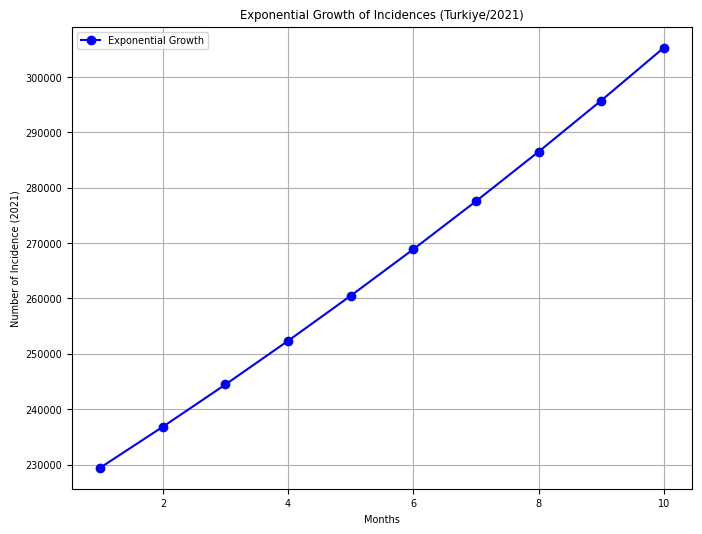

In [208]:
df_tr = pd.DataFrame(tr_var[0:11])

# Define the exponential growth function
def exponential_growth(t, A, r):
    return A * np.exp(r * t)

# Fit the exponential growth model to the data
popt, pcov = curve_fit(exponential_growth, range(len(df_tr)), df_tr['cases'][0:11])

# Extract the growth rate parameter 'r'
growth_rate_tr = popt[1] # represents r, the growth rate.

print("Estimated Growth Rate:", growth_rate_tr)
  
serial_interval = 5  # taken as 5 as approximation based on quarantine time

# Calculate reproductive ratio (R0) using the Cori method
reproductive_ratio_tr = np.exp(growth_rate_tr * serial_interval)

print("Reproductive Ratio (R0):", reproductive_ratio_tr)

# plotting exponential growth
month = np.arange(1, 11)

initial_cases = tr_var['cases'][0] # taking initial case in the beggining of 2021
cases = initial_cases * np.exp(growth_rate_tr * month)

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(month, cases, marker='o', linestyle='-', color='b', label='Exponential Growth')

plt.xlabel('Months')
plt.ylabel('Number of Incidence (2021)')
plt.title('Exponential Growth of Incidences (Turkiye/2021)')
plt.grid(True)
plt.legend()
plt.show()

Estimated Growth Rate: 0.1030288295300193
Reproductive Ratio (R0): 1.6738797702433965


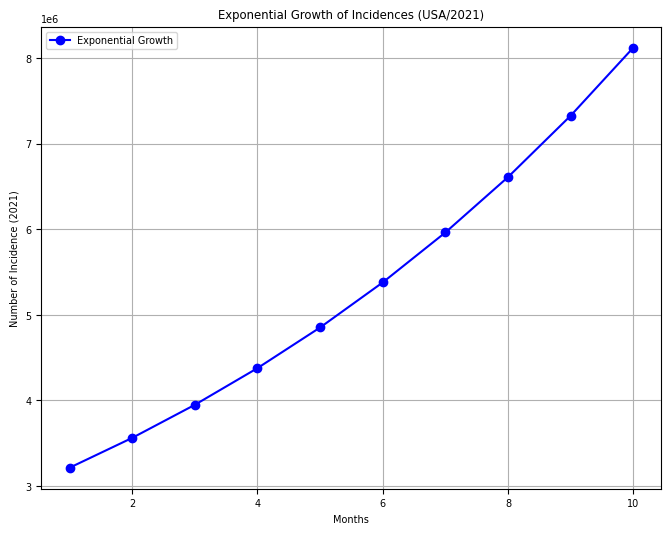

In [59]:
df_us = pd.DataFrame(us_var[0:11])

popt, pcov = curve_fit(exponential_growth, range(len(df_us)), df_us['cases'][0:11])

growth_rate_us = popt[1]

print("Estimated Growth Rate:", growth_rate_us)

reproductive_ratio_us = np.exp(growth_rate_us * serial_interval)

print("Reproductive Ratio (R0):", reproductive_ratio_us)

month = np.arange(1, 11)

initial_cases = us_var['cases'][0] # taking initial case in the beggining of 2021
cases = initial_cases * np.exp(growth_rate_us * month)

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(month, cases, marker='o', linestyle='-', color='b', label='Exponential Growth')

plt.xlabel('Months')
plt.ylabel('Number of Incidence (2021)')
plt.title('Exponential Growth of Incidences (USA/2021)')
plt.grid(True)
plt.legend()
plt.show()

Estimated Growth Rate: 0.0003187829013382134
Reproductive Ratio (R0): 1.0015951854635943


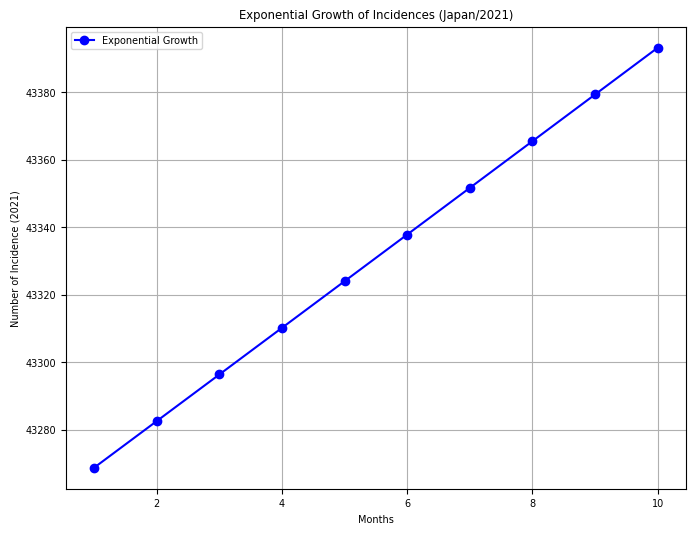

In [60]:
df_jp = pd.DataFrame(jp_var[0:11])

popt, pcov = curve_fit(exponential_growth, range(len(df_jp)), df_jp['cases'][0:11])

growth_rate_jp = popt[1]

print("Estimated Growth Rate:", growth_rate_jp)

reproductive_ratio_jp = np.exp(growth_rate_jp * serial_interval)

print("Reproductive Ratio (R0):", reproductive_ratio_jp)

month = np.arange(1, 11)

initial_cases = jp_var['cases'][0] # taking initial case in the beggining of 2021
cases = initial_cases * np.exp(growth_rate_jp * month)

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(month, cases, marker='o', linestyle='-', color='b', label='Exponential Growth')

plt.xlabel('Months')
plt.ylabel('Number of Incidence (2021)')
plt.title('Exponential Growth of Incidences (Japan/2021)')
plt.grid(True)
plt.legend()
plt.show()

Estimated Growth Rate: 0.3595411455668668
Reproductive Ratio (Rt): 6.035783836172591


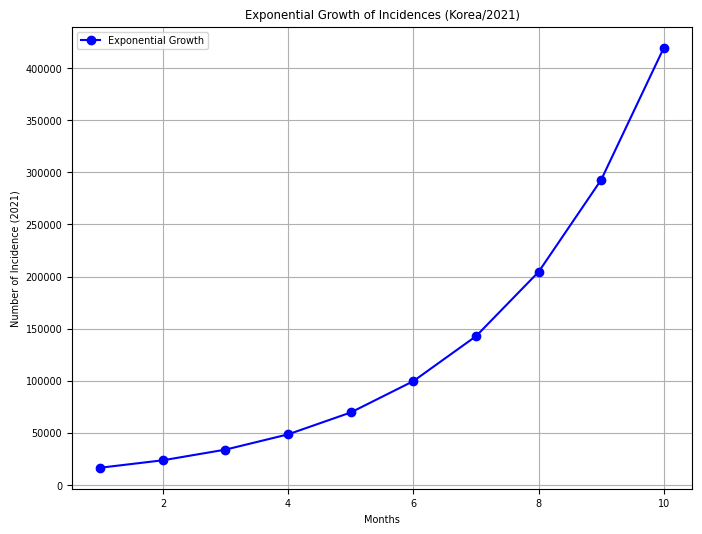

In [302]:
serial_interval = 5
df_kr = pd.DataFrame(kr_var[0:11])

popt, pcov = curve_fit(exponential_growth, range(len(df_kr)), df_kr['cases'][0:11])

growth_rate_kr = popt[1]

print("Estimated Growth Rate:", growth_rate_kr)

reproductive_ratio_kr = np.exp(growth_rate_kr * serial_interval)

print("Reproductive Ratio (Rt):", reproductive_ratio_kr)

month = np.arange(1, 11)

initial_cases = kr_var['cases'][0] # taking initial case in the beggining of 2021
cases = initial_cases * np.exp(growth_rate_kr * month)

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(month, cases, marker='o', linestyle='-', color='b', label='Exponential Growth')

plt.xlabel('Months')
plt.ylabel('Number of Incidence (2021)')
plt.title('Exponential Growth of Incidences (Korea/2021)')
plt.grid(True)
plt.legend()
plt.show()

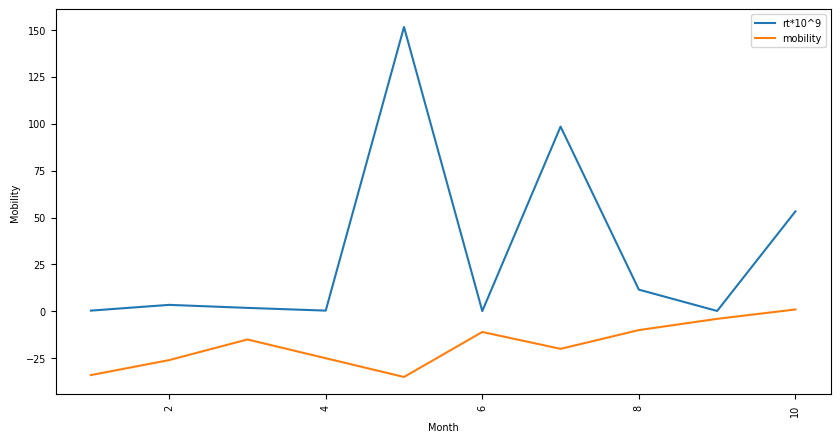

In [270]:
reproductive_ratio_trl = []
for i in range(0, 10):
    if i in tr_var.index:
        df_tr = tr_var.loc[i]
        popt, pcov = curve_fit(exponential_growth, range(len(df_tr)), df_tr['cases'])
        growth_rate_tr = popt[1]
        #print("Month:", i+1)
        #print("Estimated Growth Rate:", growth_rate_tr)
        reproductive_ratio_tr = np.exp(growth_rate_tr * serial_interval * 1000000000)
        reproductive_ratio_trl.append(reproductive_ratio_tr)
        #print("Reproductive Ratio (Rt):", reproductive_ratio_tr)
        #print()
    else:
        print(f"No data available for month {i}")
        
plt.figure(figsize=(10, 5))
#plt.subplot(1,2,1)
plt.plot(month, reproductive_ratio_trl, label='rt*10^9') 
plt.xlabel('Month')
plt.ylabel('Reproductive Ratio')
plt.xticks(rotation=90)
plt.legend()

#plt.subplot(1,2,2)
plt.plot(month, (tr_var['workplaces_percent_change_from_baseline'][0:10]), label='mobility')
plt.xlabel('Month')
plt.ylabel('Mobility')
plt.xticks(rotation=90)
plt.legend()



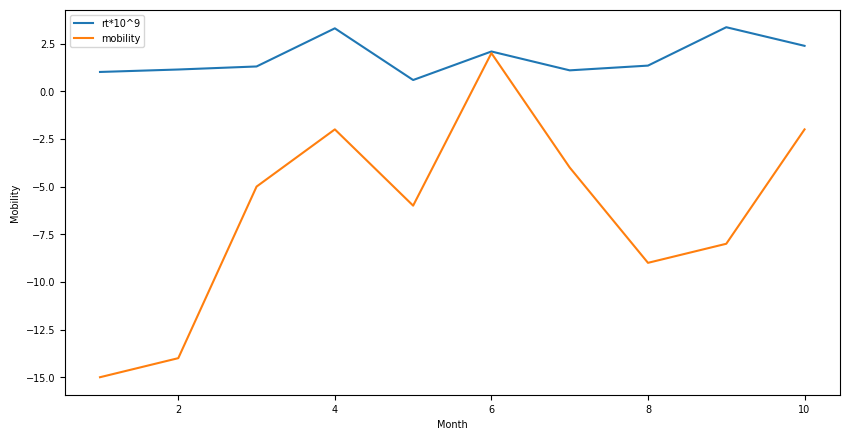

In [307]:
reproductive_ratio_krl = []
for i in range(0, 10):
    if i in kr_var.index:
        df_kr = kr_var.loc[i]
        popt, pcov = curve_fit(exponential_growth, range(len(df_kr)), df_kr['cases'])
        growth_rate_kr = popt[1]
        #print("Month:", i+1)
        #print("Estimated Growth Rate:", growth_rate_tr)
        reproductive_ratio_kr = np.exp(growth_rate_kr * serial_interval * 100000000)
        reproductive_ratio_krl.append(reproductive_ratio_kr)
        #print("Reproductive Ratio (Rt):", reproductive_ratio_tr)
        #print()
    else:
        print(f"No data available for month {i}")
        
plt.figure(figsize=(10, 5))
#plt.subplot(1,2,1)
plt.plot(month, reproductive_ratio_krl, label='rt*10^9') 
plt.xlabel('Month')
plt.ylabel('Reproductive Ratio')
plt.legend()

#plt.subplot(1,2,2)
plt.plot(month, (kr_var['workplaces_percent_change_from_baseline'][0:10]), label='mobility')
plt.xlabel('Month')
plt.ylabel('Mobility')
plt.legend()